In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns   

data = pd.read_csv('../data/Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Conteo por clase en 'label':
Número de clases: 22


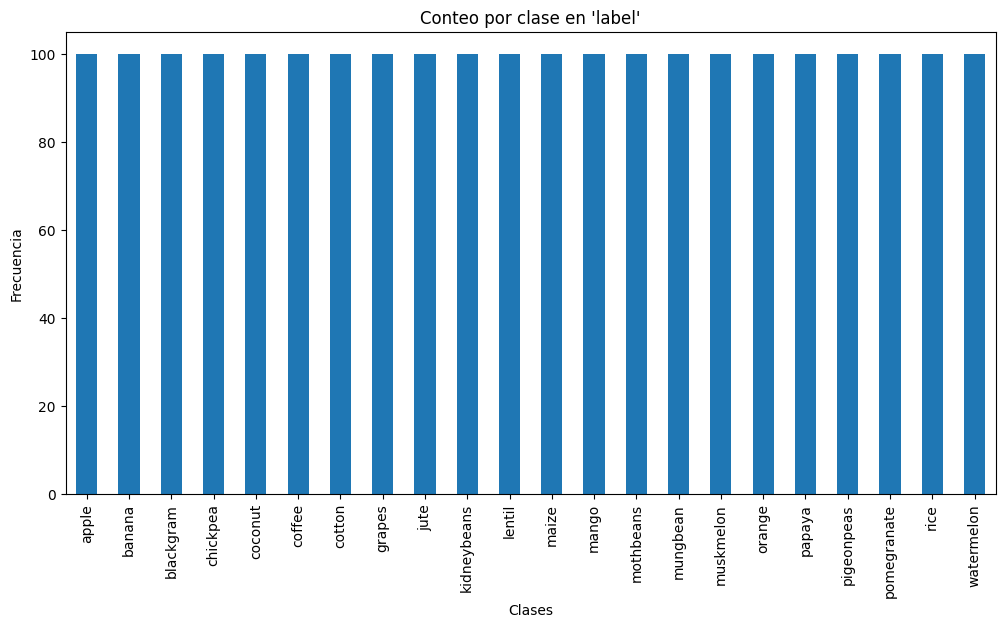

In [3]:
# >> Verificación de balance en clases <<
print("Conteo por clase en 'label':")
print("Número de clases:", data['label'].nunique())
(data['label'].value_counts()).sort_index().plot(kind='bar', figsize=(12,6))
plt.title("Conteo por clase en 'label'")
plt.xlabel("Clases")
plt.ylabel("Frecuencia")
plt.show()

**Existen 22 clases. No existe desbalance**

Comprobar valores extremos (ej. K > 150, rainfall > 250, ph fuera de [3.5,9.5]) y validar si son errores de medición o casos reales.

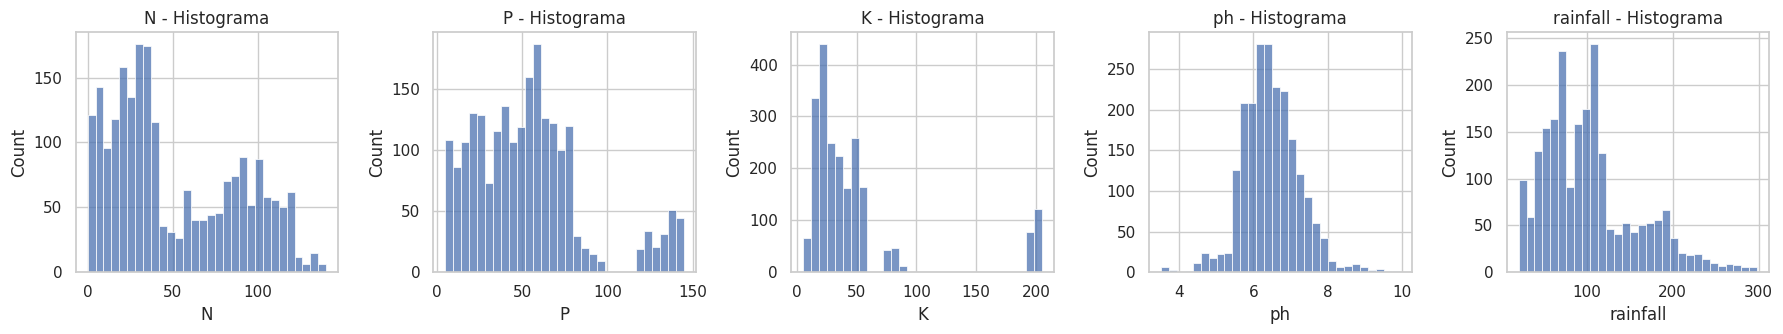

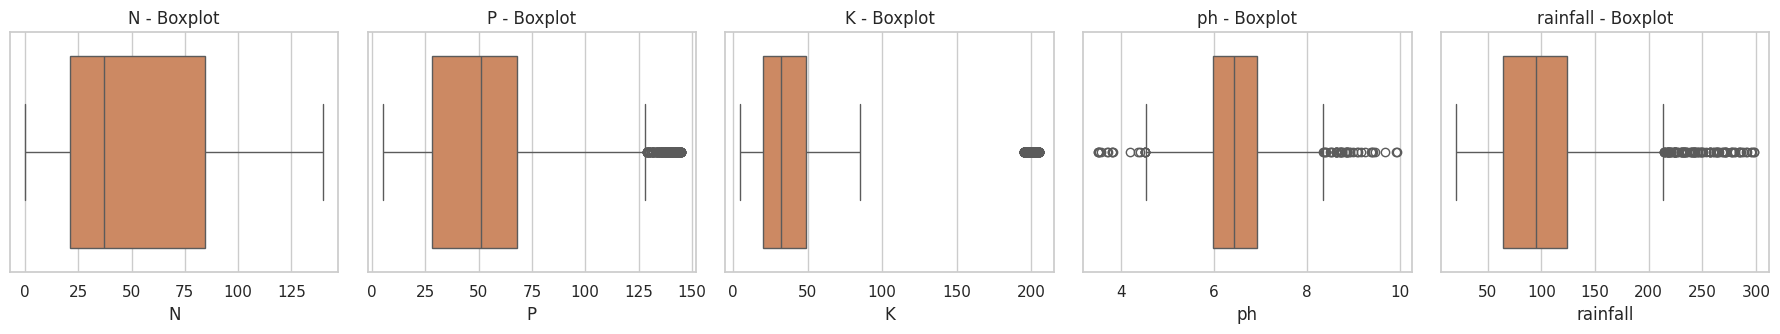

N: 0 outliers detectados por regla IQR.
P: 138 outliers. Ejemplos:


,P,label
1200,130,grapes
1201,144,grapes
1204,131,grapes
1206,140,grapes
1209,134,grapes


K: 200 outliers. Ejemplos:


,K,label
1200,195,grapes
1201,204,grapes
1202,205,grapes
1203,196,grapes
1204,196,grapes


ph: 57 outliers. Ejemplos:


,ph,label
209,8.753795,chickpea
210,8.718193,chickpea
213,8.490127,chickpea
222,8.519976,chickpea
232,8.829273,chickpea


rainfall: 100 outliers. Ejemplos:


,rainfall,label
1,226.655537,rice
2,263.964248,rice
3,242.864034,rice
4,262.717340,rice
5,251.055000,rice



Resumen de outliers por variable:
   variable  n_outliers  lower_bound  upper_bound
0         N           0   -73.875000   179.125000
1         P         138   -32.000000   128.000000
2         K         200   -23.500000    92.500000
3        ph          57     4.543768     8.351567
4  rainfall         100   -25.022047   213.841241

Número total de outliers: 495
Outliers por variable:
variable
K           200
P           138
rainfall    100
ph           57
dtype: int64


In [4]:
# >> Visualizar histogramas y boxplots para N, P, K, ph y rainfall <<
from IPython.display import display
vars_to_plot = ["N", "P", "K", "ph", "rainfall"]

# >> Estilo <<
sns.set(style="whitegrid")

# >> Histogramas (fila 1) <<
plt.figure(figsize=(18, 3.5))
for i, col in enumerate(vars_to_plot, 1):
    plt.subplot(1, len(vars_to_plot), i)
    sns.histplot(data[col], bins=30, kde=False, color="C0")
    plt.title(f"{col} - Histograma")
plt.tight_layout()
plt.show()

# >> Boxplots (fila 2) <<
plt.figure(figsize=(18, 3.5))
for i, col in enumerate(vars_to_plot, 1):
    plt.subplot(1, len(vars_to_plot), i)
    sns.boxplot(x=data[col], color="C1")
    plt.title(f"{col} - Boxplot")
plt.tight_layout()
plt.show()

# >> Identificar outliers por regla IQR (1.5 * IQR) y construir outliers_df <<
outlier_pieces = []
summary = []
for col in vars_to_plot:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask = (data[col] < lower) | (data[col] > upper)
    n = int(mask.sum())
    summary.append({'variable': col, 'n_outliers': n, 'lower_bound': float(lower), 'upper_bound': float(upper)})
    if n > 0:
        print(f"{col}: {n} outliers. Ejemplos:")
        display(data.loc[mask, [col, 'label']].head())
        tmp = data.loc[mask, [col, 'label']].reset_index().rename(columns={'index': 'original_index', col: 'value'})
        tmp['variable'] = col
        outlier_pieces.append(tmp[['original_index', 'variable', 'value', 'label']])
    else:
        print(f"{col}: 0 outliers detectados por regla IQR.")

if outlier_pieces:
    outliers_df = pd.concat(outlier_pieces, ignore_index=True)
else:
    outliers_df = pd.DataFrame(columns=['original_index', 'variable', 'value', 'label'])

# >> Resumen compacto <<
print("\nResumen de outliers por variable:")
print(pd.DataFrame(summary))
print("\nNúmero total de outliers:", len(outliers_df))
print("Outliers por variable:")
print(outliers_df.groupby('variable').size().sort_values(ascending=False) if not outliers_df.empty else 'No outliers')
